In [6]:
train_dir = '/Users/jangjaeyeong/3학년 2학기/기계학습/project/chest_xray/train'
test_dir = '/Users/jangjaeyeong/3학년 2학기/기계학습/project/chest_xray/test'
val_dir = '/Users/jangjaeyeong/3학년 2학기/기계학습/project/chest_xray/val'


In [18]:
import tensorflow as tf
#0~225 -> 0~1로 변환
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./225)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./225)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./225)


In [8]:
#dirctory로 부터 dataset을 만드는 과정
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "binary",
                                           batch_size = 64,
                                           shuffle =True
                                           )
test_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         class_mode = "binary",
                                         batch_size = 64,
                                         )
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       class_mode = "binary",
                                       batch_size = 64,
                                       shuffle =True
                                       )

Found 5220 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [20]:
#Resnet50을 재사용
from tensorflow.keras import layers

base_model = tf.keras.applications.resnet50.ResNet50(include_top= False, input_shape=(224,224,3), weights= "imagenet")


/home/ubuntu/anaconda3/envs/newbase/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step


In [21]:
for layer in base_model.layers:
    base_model.trainable = False

resnet_model = tf.keras.Sequential([
                                    base_model,
                                    layers.GlobalAveragePooling2D(),
                                    layers.Dense(1, activation="sigmoid")
])

In [22]:
resnet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [319]:
resnet_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [320]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)

history = resnet_model.fit(train_data,
                 epochs = 30,
                 steps_per_epoch= len(train_data),
                 validation_data = val_data,
                 validation_steps = len(val_datresnet_model.load_weights    callbacks = [early_stopping_cb]
                 )

Epoch 1/30
82/82 [==============================] - ETA: 0s - batch: 40.5000 - size: 63.6463 - loss: 0.3052 - acc: 0.8728

/home/ubuntu/anaconda3/envs/newbase/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


82/82 [==============================] - 140s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.3052 - acc: 0.8728 - val_loss: 1.0951 - val_acc: 0.5000
Epoch 2/30
82/82 [==============================] - 134s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.1622 - acc: 0.9406 - val_loss: 1.1663 - val_acc: 0.5000
Epoch 3/30
82/82 [==============================] - 133s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.1373 - acc: 0.9483 - val_loss: 1.2727 - val_acc: 0.5000
Epoch 4/30
82/82 [==============================] - 134s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.1192 - acc: 0.9573 - val_loss: 0.9987 - val_acc: 0.6875
Epoch 5/30
82/82 [==============================] - 133s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.1178 - acc: 0.9552 - val_loss: 0.8460 - val_acc: 0.7500
Epoch 6/30
82/82 [==============================] - 135s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.1019 - acc: 0.9611 - val_loss: 0.8313 - val_acc: 0.7500
Epoch 7/30
82/82 [=========

In [321]:
resnet_model.save_weights('all_nontrainable.h5')

In [322]:
resnet_model_evaluation = resnet_model.evaluate(test_data)

In [323]:
print(f"Resnet Model Accuracy: {resnet_model_evaluation[1]*100: 0.2f}%")

Resnet Model Accuracy:  71.31%


# Nontrainable 

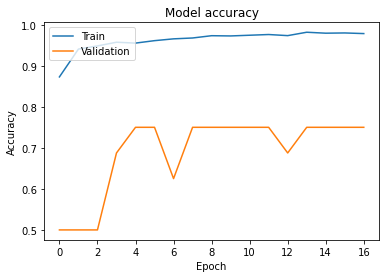

In [324]:

#accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

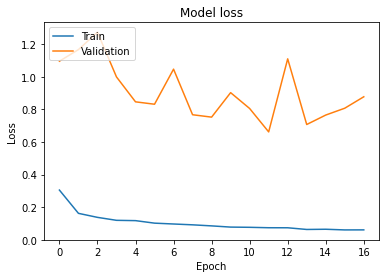

In [325]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 뒤에 5개의 layer를 unfreeze함

In [326]:
for layer in base_model.layers[:-5]:
    base_model.trainable = False
    

resnet_model = tf.keras.Sequential([
                                    base_model,
                                    layers.GlobalAveragePooling2D(),
                                    layers.Dense(1, activation="sigmoid")
])
resnet_model.load_weights('all_nontrainable.h5')

resnet_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)

history = resnet_model.fit(train_data,
                 epochs = 30,
                 steps_per_epoch= len(train_data),
                 validation_data = val_data,
                 validation_steps = len(val_data),
                 callbacks = [early_stopping_cb]
                 )

resnet_model.save_weights('5_layer_nontrainable.h5')


Epoch 1/30
82/82 [==============================] - ETA: 0s - batch: 40.5000 - size: 63.6463 - loss: 0.0739 - acc: 0.9743

/home/ubuntu/anaconda3/envs/newbase/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


82/82 [==============================] - 141s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.0739 - acc: 0.9743 - val_loss: 0.6193 - val_acc: 0.8125
Epoch 2/30
82/82 [==============================] - 133s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.0687 - acc: 0.9776 - val_loss: 0.8255 - val_acc: 0.7500
Epoch 3/30
82/82 [==============================] - 133s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.0652 - acc: 0.9782 - val_loss: 0.7548 - val_acc: 0.7500
Epoch 4/30
82/82 [==============================] - 133s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.0611 - acc: 0.9799 - val_loss: 0.9017 - val_acc: 0.7500
Epoch 5/30
82/82 [==============================] - 132s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.0610 - acc: 0.9801 - val_loss: 0.8942 - val_acc: 0.7500
Epoch 6/30
82/82 [==============================] - 133s 2s/step - batch: 40.5000 - size: 63.6463 - loss: 0.0586 - acc: 0.9822 - val_loss: 0.8130 - val_acc: 0.7500


NameError: name 'model' is not defined

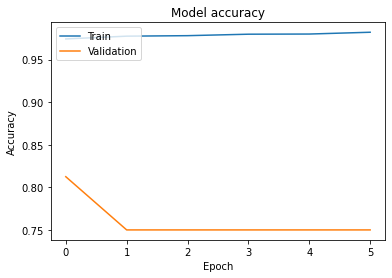

In [327]:
#accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

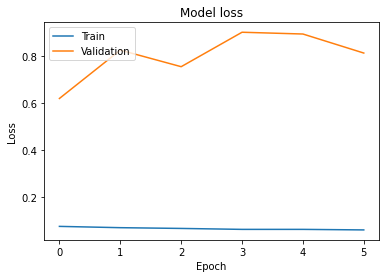

In [330]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [332]:
resnet_model_evaluation = resnet_model.evaluate(test_data)
print(f"Resnet Model Accuracy: {resnet_model_evaluation[1]*100: 0.2f}%")

Resnet Model Accuracy:  73.56%


In [225]:
model_prediction = resnet_model.predict(test_data)

/home/ubuntu/anaconda3/envs/newbase/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [226]:
prediction = tf.squeeze(tf.round(model_prediction))

prediction

<tf.Tensor 'Squeeze:0' shape=(624,) dtype=float32>

In [22]:
sample_pneumonia = tf.keras.preprocessing.image.load_img('/home/ubuntu/jaeyoung/project/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg', target_size=(224,224,3))
sample_normal = tf.keras.preprocessing.image.load_img("/home/ubuntu/jaeyoung/project/chest_xray/test/NORMAL/IM-0003-0001.jpeg", target_size=(224,224,3))
                                                         

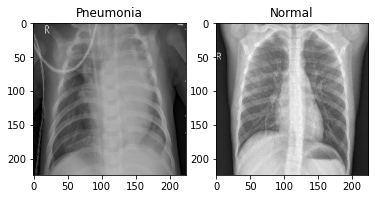

In [25]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(sample_pneumonia)
plt.title("Pneumonia")
plt.subplot(1,2,2)
plt.imshow(sample_normal)
plt.title("Normal")
plt.show()

In [68]:
import numpy as np
def image_process(image):
    sample_image = tf.keras.preprocessing.image.img_to_array(image)
    sample_image = sample_image/255.
    print(sample_image[0])
    sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image) # 0 or 1 값
    print(sample_image[0])
    sample_image = np.expand_dims(sample_image, axis =0) # (1,224,224,3)
    return sample_image

In [88]:
normal_img = image_process(sample_normal)
pneumonia_img = image_process(sample_pneumonia)

[[0.16078432 0.16078432 0.16078432]
 [0.13725491 0.13725491 0.13725491]
 [0.11764706 0.11764706 0.11764706]
 [0.1254902  0.1254902  0.1254902 ]
 [0.09411765 0.09411765 0.09411765]
 [0.20392157 0.20392157 0.20392157]
 [0.2901961  0.2901961  0.2901961 ]
 [0.3254902  0.3254902  0.3254902 ]
 [0.3529412  0.3529412  0.3529412 ]
 [0.3764706  0.3764706  0.3764706 ]
 [0.41960785 0.41960785 0.41960785]
 [0.4745098  0.4745098  0.4745098 ]
 [0.5176471  0.5176471  0.5176471 ]
 [0.49019608 0.49019608 0.49019608]
 [0.56078434 0.56078434 0.56078434]
 [0.54901963 0.54901963 0.54901963]
 [0.5529412  0.5529412  0.5529412 ]
 [0.5686275  0.5686275  0.5686275 ]
 [0.5882353  0.5882353  0.5882353 ]
 [0.57254905 0.57254905 0.57254905]
 [0.5803922  0.5803922  0.5803922 ]
 [0.5764706  0.5764706  0.5764706 ]
 [0.627451   0.627451   0.627451  ]
 [0.6784314  0.6784314  0.6784314 ]
 [0.7176471  0.7176471  0.7176471 ]
 [0.7254902  0.7254902  0.7254902 ]
 [0.7254902  0.7254902  0.7254902 ]
 [0.7058824  0.7058824  0.70

In [89]:
prediction_normal = resnet_model.predict(normal_img)
prediction_pneumonia = resnet_model.predict(pneumonia_img)

In [90]:
print(prediction_normal,prediction_pneumonia)

[[0.]] [[0.]]


In [91]:
def display_prdiction(prediction, image):
    if prediction[0][0] == 1:
        plt.imshow(image)
        plt.title("Normal")
    else:
        plt.imshow(image)
        plt.title("Pneumonia")

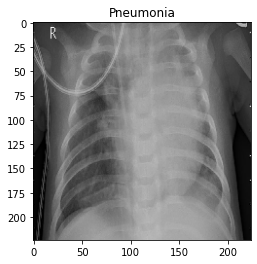

In [92]:
display_prdiction(prediction_pneumonia, sample_pneumonia)

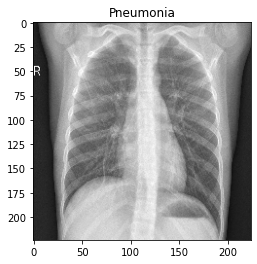

In [93]:
display_prdiction(prediction_normal, sample_normal) # wrong prediction


In [227]:
history.history

{'loss': [0.14014507962052086,
  0.12139054629498457,
  0.10632480067508068,
  0.09634721119397215,
  0.09153192034224986,
  0.0893315732983034,
  0.08258081960321775,
  0.07985247613929611,
  0.07846204128346924,
  0.06896329275274396,
  0.06470691352871374],
 'acc': [0.9494156,
  0.9515233,
  0.96225333,
  0.964361,
  0.9681931,
  0.96589386,
  0.9708756,
  0.9720253,
  0.9716421,
  0.9787316,
  0.9800728],
 'val_loss': [0.7155542969703674,
  0.984091579914093,
  0.6792216300964355,
  0.6761780381202698,
  0.6241691708564758,
  0.5777437686920166,
  0.690253496170044,
  0.9672470092773438,
  0.7987744212150574,
  0.7487581968307495,
  0.9159752130508423],
 'val_acc': [0.625,
  0.5625,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.6875,
  0.75,
  0.75,
  0.6875]}

# train/Normal image & train/pneumonia image 크기 확인

(1434, 1810, 3)
(439, 712, 3)


Text(0.5, 1.0, 'PNEUMONIA')

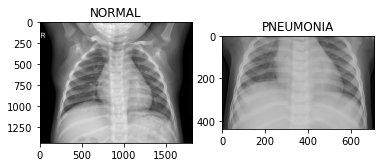

In [114]:
from keras.preprocessing.image import load_img, img_to_array
#현재 우리가 사용하는 이미지

normal_image = img_to_array(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/NORMAL/IM-0119-0001.jpeg'))
pneumonia_iamge = img_to_array(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg'))
# image = tf.keras.preprocessing.image.load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/PNEUMONIA/person100_bacteria_482.jpeg')
plt.subplot(1,2,1)
plt.imshow(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/NORMAL/IM-0119-0001.jpeg'))
plt.title("NORMAL")
print(normal_image.shape)
plt.subplot(1,2,2)
plt.imshow(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg'))
print(pneumonia_iamge.shape)
plt.title("PNEUMONIA")


(224, 224, 3)
(224, 224, 3)


Text(0.5, 1.0, 'PNEUMONIA')

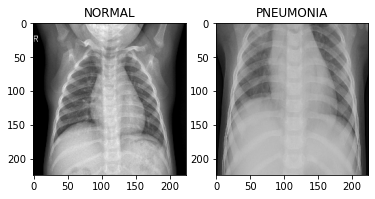

In [116]:
normal_image = img_to_array(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/NORMAL/IM-0119-0001.jpeg',target_size=(224,224,3)))
pneumonia_iamge = img_to_array(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg',target_size=(224,224,3)))
# image = tf.keras.preprocessing.image.load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/PNEUMONIA/person100_bacteria_482.jpeg')
plt.subplot(1,2,1)
plt.imshow(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/NORMAL/IM-0119-0001.jpeg',target_size=(224,224,3)))
plt.title("NORMAL")
print(normal_image.shape)
plt.subplot(1,2,2)
plt.imshow(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg',target_size=(224,224,3)))
print(pneumonia_iamge.shape)
plt.title("PNEUMONIA")


# Image Augmentation

In [22]:
#Data augmentation 인자 확인해 보기 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
    rotation_range = 10
                        )
img = load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/NORMAL/IM-0119-0001.jpeg')
x = img_to_array(img)
x = x.reshape((1,)+ x.shape)#(1,224,224,3)
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='/home/ubuntu/jaeyoung/project/chest_xray/augimg',save_prefix='NORMAL',save_format='jpeg'):
    i+=1
    if i>8:
        break


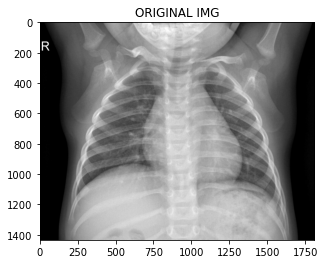

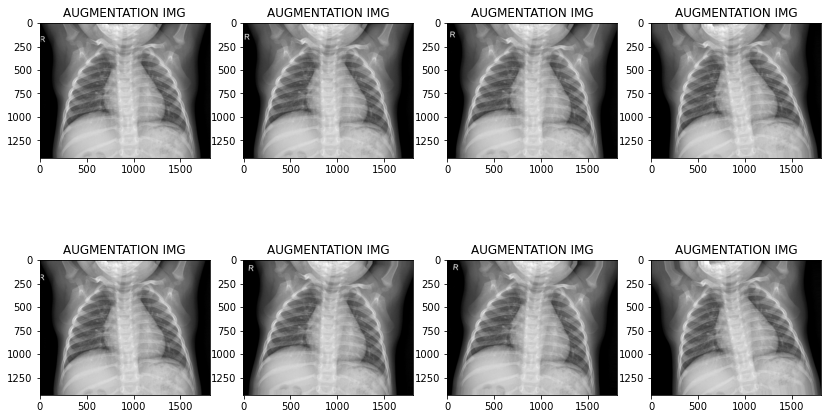

In [315]:
# 10도 회전을 진행한 사진
files = glob('/home/ubuntu/jaeyoung/project/chest_xray/augimg/*.jpeg')
i = 1
plt.figure()
plt.imshow(load_img('/home/ubuntu/jaeyoung/project/chest_xray/train/NORMAL/IM-0119-0001.jpeg'))
plt.title('ORIGINAL IMG')
plt.show()
plt.figure(figsize=(14,8))
for file in files:
    plt.subplot(2,4,i)  # 직접 Figure 객체를 생성
    plt.imshow(load_img(file))
    plt.title('AUGMENTATION IMG')
    i+=1

